In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import joblib

In [2]:
#Loading the dataset
df = pd.read_csv(r"fake_news_merged_final.csv")
df.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,fear,joy,disgust,sad,speaker_id,list,sentiment_code,full_text,emotion,digit
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_,abortion says the annies list political group ...,"[0.121137,0.263479,0.008926,0.026096,0.531887,...",0
1,10540.json,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_,energy history job accomplishments when did th...,"[0.095352,0.016999,0.124566,0.191357,0.102045,...",1
2,324.json,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_,foreign policy hillary clinton agrees with joh...,"[0.039559,0.454228,0.024162,0.500384,0.052453,...",1
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_,NaN,"[0.004804,0.022509,0.194674,0.375055,0.383403,...",0
4,9028.json,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN,NaN,"[0.044237,0.045672,0.215996,0.222402,0.274343,...",1


In [3]:
df['full_text'] = df['full_text'].fillna('')
df['full_text'][1]

df.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text                  0
emotion                    0
digit                      0
dtype: int64

In [4]:
unique_labels = df['label'].unique()
print(unique_labels)

[False  True]


In [5]:
df.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text                  0
emotion                    0
digit                      0
dtype: int64

In [8]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(df['full_text'])
Y = df['label']

In [9]:
#Splitting the dataset into train and test sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
#Creating and training the SVM model
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel.fit(X_Train, Y_Train)

RandomForestClassifier(random_state=42)

In [11]:
#Making predictions on the testing set
Y_Pred = RFModel.predict(X_Test)

In [12]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

#Printing classification report
print("Classification Report:")
report = classification_report(Y_Test, Y_Pred, target_names=['fake', 'real'])
print(report)

#Calculating and print accuracy
accuracy = accuracy_score(Y_Test, Y_Pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_Test, Y_Pred, average=None)

#Printing precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

Classification Report:
              precision    recall  f1-score   support

        fake       0.55      0.07      0.13      1446
        real       0.63      0.96      0.76      2390

    accuracy                           0.63      3836
   macro avg       0.59      0.52      0.45      3836
weighted avg       0.60      0.63      0.52      3836

Accuracy: 62.83%
Precision (Fake): 55.26%
Precision (Real): 63.22%
Recall (Fake): 7.26%
Recall (Real): 96.44%
F1-Score (Fake): 12.84%
F1-Score (Real): 76.38%


In [13]:
from sklearn.metrics import confusion_matrix

#Assuming Y_Test and Y_Pred are the true labels and predicted labels, respectively

#Calculating confusion matrix
conf_matrix = confusion_matrix(Y_Test, Y_Pred)

#Extracting TP, FP, TN, FN from confusion matrix
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[1, 1]
FN = conf_matrix[1, 0]

#Printing explanations and corresponding numbers
print("\033[1mTrue Positive: The number of instances, when the model predicted FAKE news as FAKE only \033[0m ")
print("True Positive:", TP)
print()
print("\033[1mFalse Positive: The number of instances, when the model predicted as FAKE news, but it is a REAL news\033[0m")
print("False Positive:", FP)
print()
print("\033[1mFalse Negative: The number of instances, when the model predicted as REAL news, but it is a FAKE news\033[0m")
print("False Negative:", FN)
print()
print("\033[1mTrue Negative: The number of instances, when the model predicted REAL news as REAL only\033[0m")
print("True Negative:", TN)


True Positive: The number of instances, when the model predicted FAKE news as FAKE only  
True Positive: 105

False Positive: The number of instances, when the model predicted as FAKE news, but it is a REAL news
False Positive: 1341

False Negative: The number of instances, when the model predicted as REAL news, but it is a FAKE news
False Negative: 85

True Negative: The number of instances, when the model predicted REAL news as REAL only
True Negative: 2305


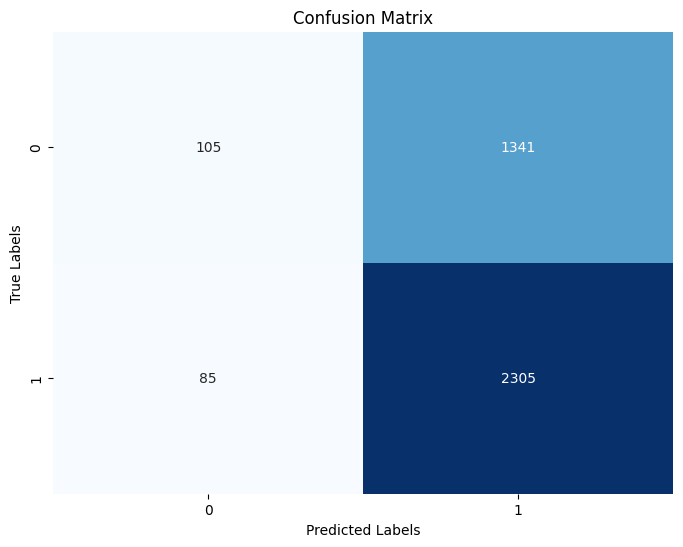

In [14]:
#Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

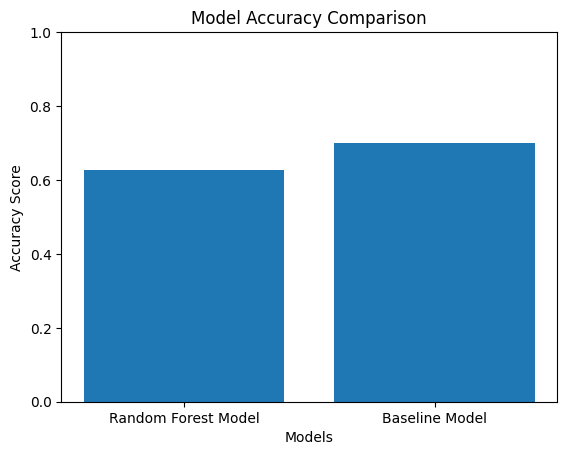

In [15]:
AccuracyScores = [accuracy_score(Y_Test, Y_Pred), 0.70]  
Models = ['Random Forest Model', 'Baseline Model']

plt.bar(Models, AccuracyScores)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])  #Setting the y-axis limits between 0 and 1
plt.show()

In [22]:
# Assuming you have a trained Random Forest model named 'rf_model'
# Assuming you have a sentence to test named 'sentence'
# Assuming you have the vectorizer used for training named 'Vectorizer'

# Preprocess the sentences (vectorize them) using the same vectorizer used for training
X_test = Vectorizer.transform(['health care states says the paperback edition of mitt romneys book deleted line that massachusetts individual mandate should be the model for the country 42 governor republican '])
X_test2 = Vectorizer.transform(['energy history job accomplishments when did the decline of coal start it started when natural gas took off that started to begin in president george w bushs administration 1 state delegate democrat '])

# Make predictions
prediction = RFModel.predict(X_test)
prediction2 = RFModel.predict(X_test2)

print("The first statement prediction is:", prediction)
print("The second statement prediction is:", prediction2)

The first statement prediction is: [ True]
The second statement prediction is: [ True]


In [23]:
if prediction[0] == False:
    result = 'Fake News'
else:
    result = 'Real News'
print("This is a : "+result)

This is a : Real News
